# Time and Date Series in Python and Pandas II

In the previous tutorials we have learned how to use basic python libraries, seaborn, pandas, matplotlib etc. This tutorial uses time series to put together many of the previosu teachings in a practical example of data analysis.

The tutorial is heavily inspired by a tutorial by Jake VanderPlas available in his [Python Data Science Handbook](https://www.oreilly.com/library/view/python-data-science/9781491912126/).

#### Learning goals

  - Manipulate real time series data
  - Plot time series data
  
#### Prerequisites
  - Python and NumPy
  - Pandas, DataFrames and TimeSeries
  - Seaborn
  - Matplotlib
  
 ---

The goal of this tutorial is to put together many of the previous teahcings to analyze real world data.

We will use open [data about hourly bicycle counts made available by the city of Seattle, WA](http://data.seattle.gov/). A copy of the dataset for this tutorial was sent before class.

Seattle has a bridge called Fremont Bridge. The bridge has installed devices that count bycles passing over the bridge (an automated bicycle counter). The sensors are located in the east and west sidewalks of the bridge.

### Data loading and preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set() # this will set seaborn as the default formatting for all plots
import matplotlib.pyplot as plt

The first we will do is to load the data into a Pandas DataFrame. 

Make sure the data is saved inside a folder called 'datasets' saved in the current directory.

In [10]:
data = pd.read_csv('./datasets/Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)

After loading the data, let's take a quick look at the DataFrame. Just the first few rows. In this way, we will also test if everything is loaded and ready.

In [11]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


The labels in the columns of are a bit too long for our purposes. So we will simolify them into 'Total', 'West' and 'East'. These are the counts (how many bicycles) in the West or East sidewalks and the Total counts across the two sidewlaks, 'Total'.

In [12]:
data.columns = ['Total','East', 'West']

We will now recompute the total counts and save them back into the column called Total. 

Note. We use the method `eval`, that (ahem) evaluates a Python expression as a string. Meaning you can write a string, for a command and `eval` will run the command for you, like adding two columns of a DataFrame.

In [15]:
data1 = data
data1['Total'] = data1.eval('West + East')
data1.head()
data1.dropna().describe()

,Total,East,West
count,150134.000000,150134.000000,150134.000000
mean,109.507420,49.640488,59.866932
std,139.596963,64.238184,86.696586
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,144.000000,67.000000,74.000000
max,1097.000000,698.000000,850.000000


In [16]:
data['Total'] = data['West'] + data['East']
data.head()
data_tem = data.dropna()
data_tem.describe()

,Total,East,West
count,150134.000000,150134.000000,150134.000000
mean,109.507420,49.640488,59.866932
std,139.596963,64.238184,86.696586
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,144.000000,67.000000,74.000000
max,1097.000000,698.000000,850.000000


We can now take a look at the reorganized columns. This time using `describe`. But we want to drop the missing entries, so we use first `dropna`.

In [ ]:
data.dropna().describe()

Note the code above is a single line shortcut to a couple of operations. So we could have also written it in two steps. For example:

In [ ]:
temp = data.dropna()
temp.describe()

Even though we have stressed the importance of being explicit with the coding, this single line instance is a helpful one. It shortens the code and it avoids creating the tempoary variable `temp`. 

### Data visualization

The next thing we can do with the data is to visualize the time series. We can plot for example the counts (`Y` axis) by date (`X` axis).

Text(0, 0.5, 'Bicycle per hour')

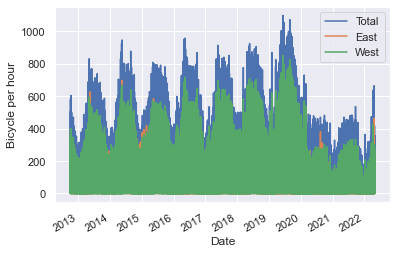

In [17]:
data.plot()
plt.ylabel("Bicycle per hour")

Alright a lot of data here. From 2013 to 2022, up to thousands of bicycles counted.

One way to approach TimeSeries of this density is to resample the. Pandas TimeSeries offer ways to resample the data say from days to weeks or from weeks to months, etc. The method is `DataFrame.resample()`, let's use it on our DataFrame, see hereafter.


In [18]:
weekly = data.resample('W').sum()
weekly.describe()

,Total,East,West
count,500.000000,500.000000,500.000000
mean,32881.574000,14905.474000,17976.124000
std,15647.504993,7282.693554,8915.344706
min,439.000000,198.000000,241.000000
25%,20267.000000,8783.250000,11040.000000
50%,31315.000000,14283.000000,16911.000000
75%,46778.000000,21271.000000,24640.000000
max,71368.000000,33694.000000,43928.000000


We have now resampled the data by summing the counts at a weekly rate. So all the counts of  by day were summed for all days in a week. 

Let's now take a look at the plot of this data. Do you expect the values in the `Y` axis to be larger?

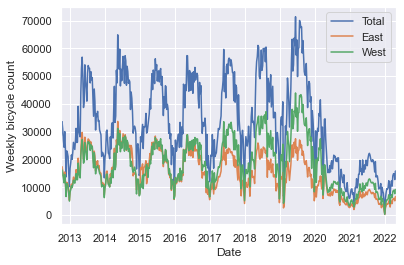

In [21]:
weekly.plot(style=['-', '-', '-'])
plt.ylabel('Weekly bicycle count');

The new plot shows a much larger number in the totals. There are differences between the west and east sidewalks. (More bicycles in the East?)

Neat! That was easy. Pandas TimeSeries rock. Imagine having to find the weeks, and the counts associated to them. 

The plot above also seems to have some patterns in it. For example, we observe the data to go up and down for each of the traces. Possibly, in some part of each year more bicycles are counted. 

Can you guess when it might be that more bicycles are counted on this bridge in Seattle? (Guess this is not Texas.)

### Smoothing and simplifying the data

It looked like the data had some pattern into it, perhaps higher bicycle counts in the better weather months. Yet, the data still showed quite a bit of fluctuations, noise.

Next, we will try to first make the data look smoother. One way to do that is to compute the mean of the counts over a certain period. That should in principle 'average out' some of the fluctuations across days for example. 

OK. To test this approach, "average out" the noise by averaging the counts we will do the following:

  - Resample the data back to days.
  - Compute an average, a rollling average, across the days in a month. 
  
`DataFrame.rolling()` does precisely what we need. It averages across a certain number of data (say 15, or 30 days etc). 

We will first break this process down and then rewrite it into a single line command.

In [23]:
daily = data.resample('D').sum()
daily.describe()

,Total,East,West
count,3497.000000,3497.000000,3497.000000
mean,4701.397484,2131.180154,2570.220761
std,2832.995770,1274.241886,1647.347942
min,0.000000,0.000000,0.000000
25%,2354.000000,1065.000000,1271.000000
50%,4310.000000,2008.000000,2184.000000
75%,6694.000000,3010.000000,3722.000000
max,12856.000000,6286.000000,8100.000000


We resampled back to daily sums of the counts.

Next, we are going to use `.rolling()` to compute an average over a period of 30 days, centered at each day.

In [24]:
temp = daily.rolling(30, center=True).sum()

We saved the result in a new DataFrame called `temp`, we can take a peak at it.

In [25]:
temp.describe()

,Total,East,West
count,3468.000000,3468.000000,3468.000000
mean,141312.256632,64033.479815,77278.880623
std,64272.107761,29950.627350,36654.768986
min,18886.000000,7452.000000,11434.000000
25%,88432.000000,38822.250000,48796.500000
50%,134509.000000,61196.000000,70996.000000
75%,200075.500000,92281.000000,106518.000000
max,296292.000000,127000.000000,185854.000000


We have counts that are lower as we have averaged over 30 days. Neat.

Now we can plot the data and take a look at the new plot. Hopefully, we have simplified the visualization by 'averaging away' some of the smaller fluctuations:

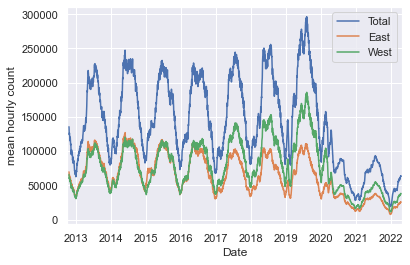

In [26]:
temp.plot(style=['-', '-', '-'])
plt.ylabel('mean hourly count');

Ok, looks a little bit better. Especially so for the West ad East data. We can try to get a smoother version by averaging using a gaussian window. This is a normal distribution that will wait more the counts close to the current day being averages and less and less, with a Gaussian distribution weighting the days further away from the current day (the day in the center of the window).

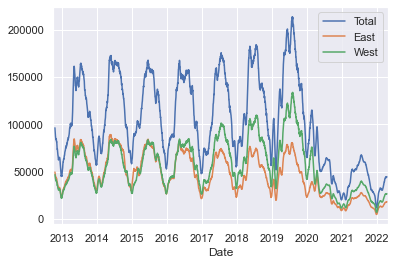

In [32]:
daily.rolling(30, center=True,
              win_type='gaussian').sum(std=10).plot(style=['-', '-', '-']);

Ok, even better. Note also how this time we avoinded using the intermediate variable `temp`, instead we averaged and plotted all in a single python line of code.

To improve the smoothness we could additionally average over a longer period, more days, for example 60.

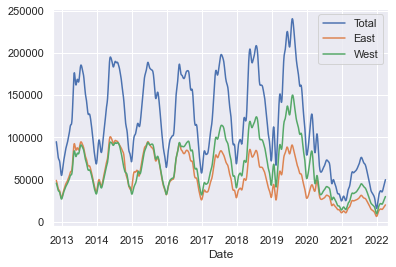

In [34]:
daily.rolling(60, center=True,
              win_type='gaussian').sum(std=10).plot(style=['-', '-', '-']);

OK, now, that looks really good. Yet, it still has some wiggle and even averaging over more days, it is not going to help it. Try, change the number of days to 120 or 180, is it better? Smoother?

### Looking at the data at higher resolution.

Smoothing the data was helpful but did not seem to provide deeper insights into the properties of this dataset. We were able to better see the same features that we saw earlier on in the dataset. Yet, we only saw the same features.

Let's try next to see if we can identify more features. To do so, let's look at the data in the opposite way, instead of smoothing over days, let's look at the data in a hournly fashion.

We can use `DataFrame.groupby()` to get the data by time of the day (`btod`) and compute the mean over that time of the day.

In [35]:
by_time = data.groupby(data.index.time).mean()

Wel that was fast this was an average across all days, all weeks, all months, all years! Lot's of data, Pandas is pretty fast.

Let's look at the DataFrame.

In [36]:
by_time.describe()

,Total,East,West
count,24.000000,24.000000,24.000000
mean,109.498572,49.636131,59.862499
std,102.173186,45.501802,63.090426
min,2.778488,1.405786,1.372703
25%,23.408854,11.719909,11.261237
50%,92.993365,48.196313,45.850600
75%,151.427462,67.683064,80.127235
max,371.441976,176.422727,262.507193


A much smaller dataset. Averaged across 24 hours... Neat. Simple. Fast.

Let's plot the new dataset. To do so, given that we have data at an hourly rate. We will need to create some proper x-axis ticks, with the right numbers:

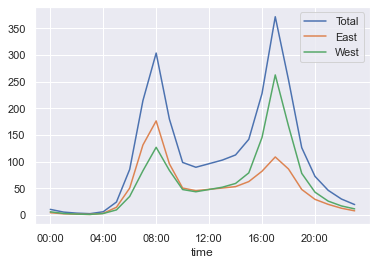

In [38]:
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', '-', '-']);

Nice plot.

We learn here that there are a lot fo bicycles in the morning and in the afternoon. That makes sense. It must be that people in Seattle commute by bicycle. Excellent finding!

If we can see daily changes in counts due to communting, can we also see weekly changes? For example, would the weeked see less bicycles as less people go to work?

We can use `groupby` to address and average the data weekly. Whereas earlier we had used `groupby` and indexed and averaged the data by time (`data.index.time`), here we can use the Padas TimeSeries index by days of the week, which is available (try `data.index.<TAB>` to see all available indices):

In [39]:
by_weekday = data.groupby(data.index.dayofweek).mean()

OK similar operations, grouped and averaged the data by day of the week instead of by hours. This means that we averaged all Mondays, all Tueadays, All Wednesdays, etc.

We now need to make a legend (by day of the week) and plot the new summary data:

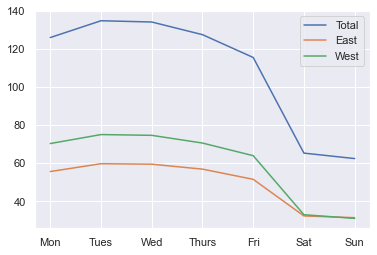

In [41]:
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-', '-', '-']);

As predicted, there is a strong difference between week days and weekend days. More, bicycles during the week days.

Let's conclude. Make the two final plots organized together so to show the two patterns, daily bimodal distribution and weekly unimodal distribution:

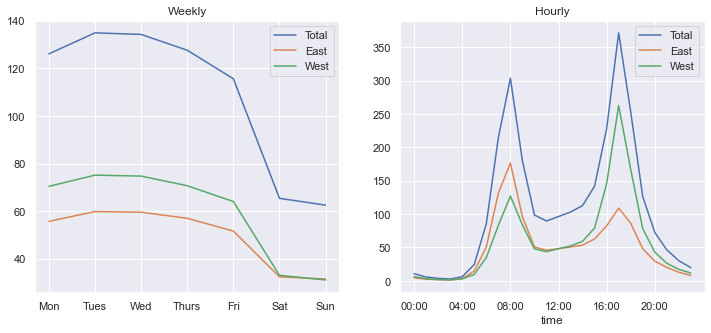

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
by_weekday.plot(ax=ax[0], title='Weekly',
                          style=['-', '-', '-'])
by_time.plot(ax=ax[1], title='Hourly',
                       xticks=hourly_ticks, 
                       style=['-', '-', '-']);

Let's be happy with this. We have used `matplotlib`, `seaborn`, and `pandas` to study a real dataset and evidence patterns of daily and weekly commute behavior of the peopel living in Seattle.

Well done!

### Exercise.

Look at any pattern across months? For example does the weather in the colder months affect the commute by bicycle?